In [ ]:
install.packages("factoextra")
install.packages("cluster")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(factoextra)
library(cluster)

Loading required package: ggplot2

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



In [ ]:
df <- read.csv('USArrests.csv')

In [ ]:
df <- na.omit(df)

In [ ]:
df <- scale(df[-1])
head(df)

,Murder,Assault,UrbanPop,Rape
1,1.24256408,0.7828393,-0.5209066,-0.003416473
2,0.50786248,1.1068225,-1.2117642,2.484202941
3,0.07163341,1.4788032,0.9989801,1.042878388
4,0.23234938,0.2308680,-1.0735927,-0.184916602
5,0.27826823,1.2628144,1.7589234,2.067820292
6,0.02571456,0.3988593,0.8608085,1.864967207


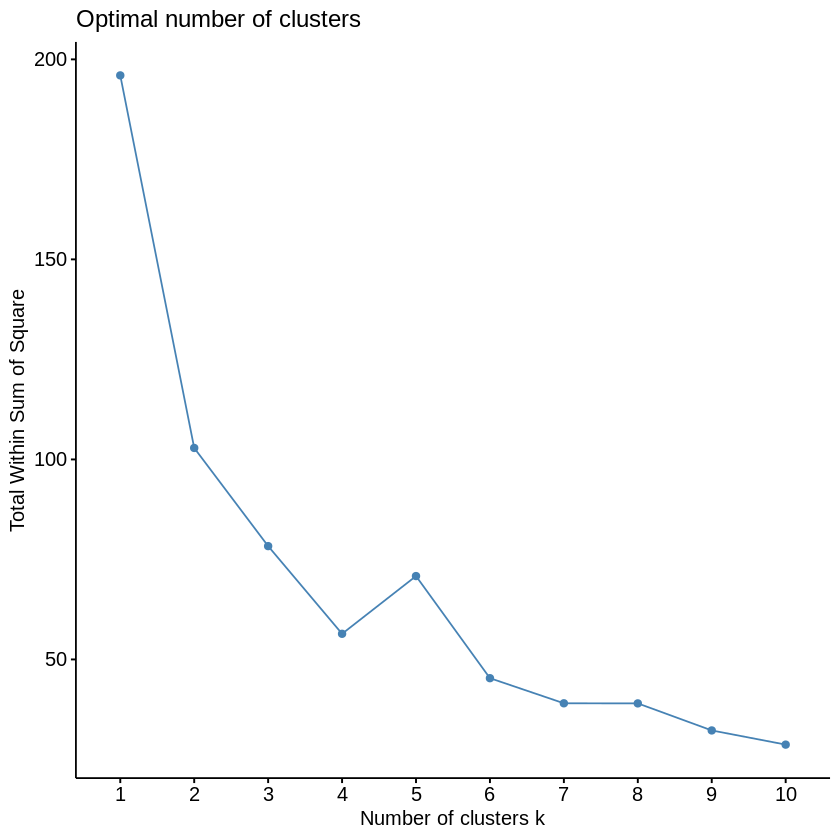

In [ ]:
fviz_nbclust(df, kmeans, method = "wss")

In [ ]:
gap_stat <- clusGap(df,
                    FUN = kmeans,
                    nstart = 25,
                    K.max = 10,
                    B = 50)

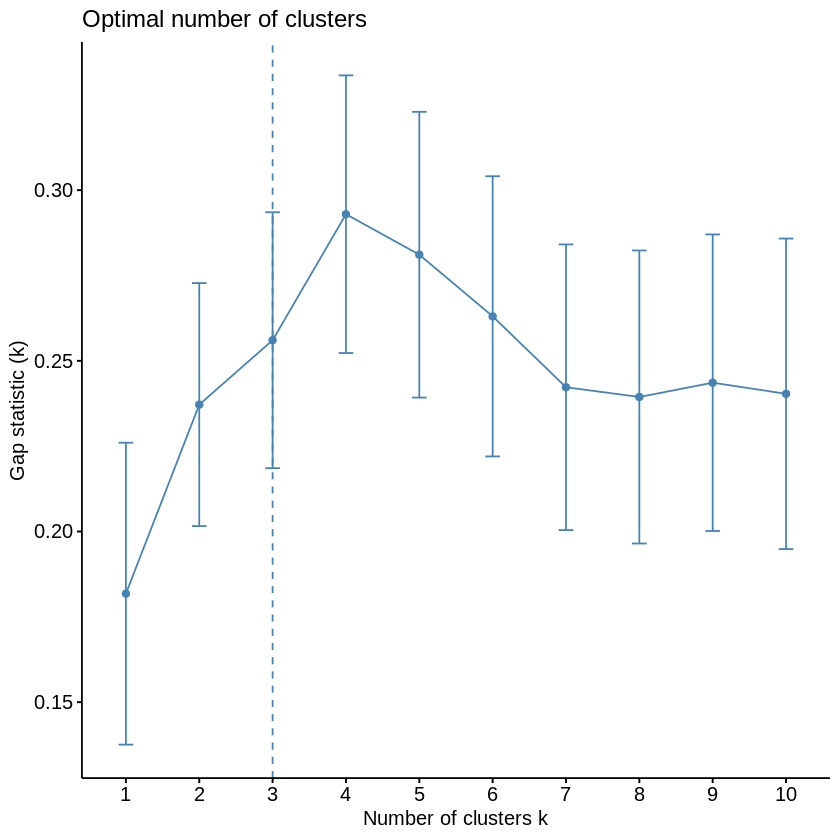

In [ ]:
fviz_gap_stat(gap_stat)

In [ ]:
set.seed(1)
km <- kmeans(df, centers = 4, nstart = 25)
km

K-means clustering with 4 clusters of sizes 13, 13, 16, 8

Cluster means:
      Murder    Assault   UrbanPop        Rape
1 -0.9615407 -1.1066010 -0.9301069 -0.96676331
2  0.6950701  1.0394414  0.7226370  1.27693964
3 -0.4894375 -0.3826001  0.5758298 -0.26165379
4  1.4118898  0.8743346 -0.8145211  0.01927104

Clustering vector:
 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 
 4  2  2  4  2  2  3  3  2  4  3  1  2  3  1  3  1  4  1  2  3  2  1  4  2  1 
27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 
 1  2  1  3  2  2  4  1  3  3  3  3  3  4  1  4  2  3  1  3  3  1  1  3 

Within cluster sum of squares by cluster:
[1] 11.952463 19.922437 16.212213  8.316061
 (between_SS / total_SS =  71.2 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

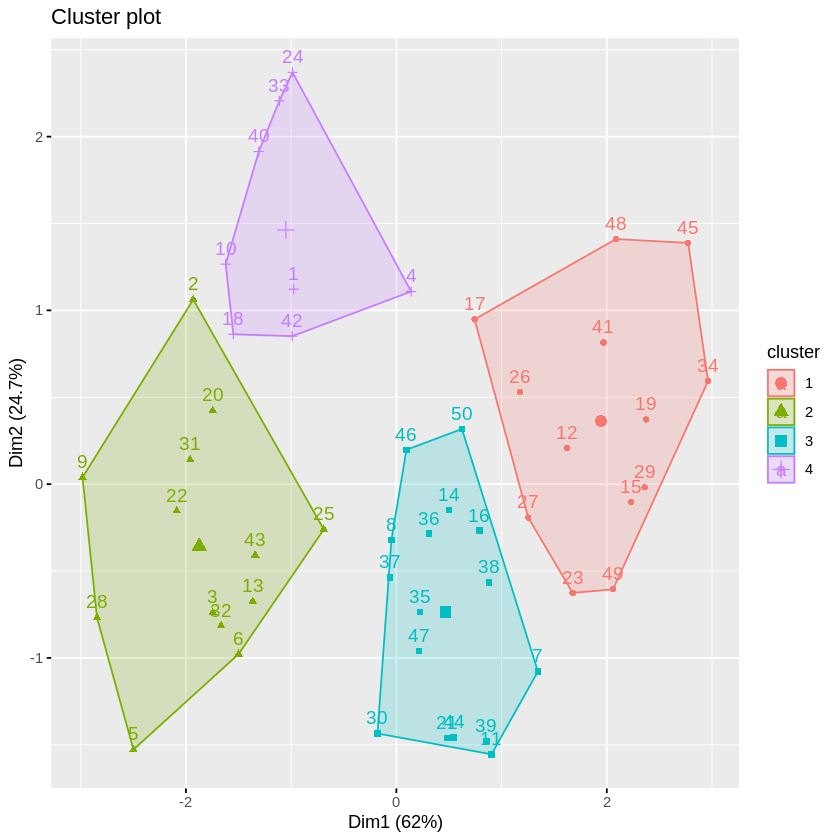

In [ ]:
fviz_cluster(km, data = df)

In [ ]:
aggregate(USArrests, by=list(cluster=km$cluster), mean)

cluster,Murder,Assault,UrbanPop,Rape
<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,3.60000,78.53846,52.07692,12.17692
2,10.81538,257.38462,76.00000,33.19231
3,5.65625,138.87500,73.87500,18.78125
4,13.93750,243.62500,53.75000,21.41250


In [ ]:
final_data <- cbind(USArrests, cluster = km$cluster)
head(final_data)

,Murder,Assault,UrbanPop,Rape,cluster
,<dbl>,<int>,<int>,<dbl>,<int>
Alabama,13.2,236,58,21.2,4
Alaska,10.0,263,48,44.5,2
Arizona,8.1,294,80,31.0,2
Arkansas,8.8,190,50,19.5,4
California,9.0,276,91,40.6,2
Colorado,7.9,204,78,38.7,2
